In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score

In [2]:
df = pd.read_csv('Solar_Power_Generation.csv')
df.head()

,MODULE_TEMP,Amb_Temp,WIND_Speed,IRR (W/m2),DC Current in Amps,AC Ir in Amps,AC Iy in Amps,AC Ib in Amps,AC Power in Watts
0,18.7675,17.85190,0.952101,6.388252,0.60,8.6,8.6,8.7,3233
1,18.6150,18.59573,1.285337,12.776500,0.66,9.6,9.7,10.0,4504
2,18.9200,18.59573,1.713782,17.035340,4.74,11.9,12.0,12.4,6614
3,18.9200,18.59573,1.666177,25.553010,8.18,14.8,14.7,14.7,8971
4,19.0725,18.59573,1.142522,36.200090,26.66,18.6,18.4,18.5,12071


In [3]:
print(df.shape)

(118865, 9)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118865 entries, 0 to 118864
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   MODULE_TEMP         118865 non-null  float64
 1   Amb_Temp            118865 non-null  float64
 2   WIND_Speed          118865 non-null  float64
 3   IRR (W/m2)          118865 non-null  float64
 4   DC Current in Amps  118865 non-null  float64
 5   AC Ir in Amps       118865 non-null  float64
 6   AC Iy in Amps       118865 non-null  float64
 7   AC Ib in Amps       118865 non-null  float64
 8   AC Power in Watts   118865 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 8.2 MB


In [5]:
df.describe()

,MODULE_TEMP,Amb_Temp,WIND_Speed,IRR (W/m2),DC Current in Amps,AC Ir in Amps,AC Iy in Amps,AC Ib in Amps,AC Power in Watts
count,118865.000000,118865.000000,118865.000000,118865.000000,118865.000000,118865.000000,118865.000000,118865.000000,118865.000000
mean,37.141972,22.961983,4.488581,428.093276,355.902071,172.329754,172.190557,172.351243,128081.179666
std,12.017936,3.921594,4.604769,313.280827,264.863384,120.507508,120.448101,120.503308,91193.677193
min,8.855000,10.413610,0.004761,2.129417,0.600000,1.400000,1.400000,1.500000,394.000000
25%,26.697500,20.083390,0.566500,155.447500,126.180000,65.600000,65.500000,65.600000,47737.000000
50%,36.457500,23.058700,1.180606,357.742100,298.600000,150.000000,150.000000,150.100000,110673.000000
75%,46.675000,26.034020,8.854542,687.801800,576.320000,277.700000,277.400000,277.600000,206594.000000
max,72.447500,34.959970,11.948870,1494.851000,995.679988,461.200000,461.100000,461.700000,332614.000000


In [6]:
df.isnull().sum()

MODULE_TEMP           0
Amb_Temp              0
WIND_Speed            0
IRR (W/m2)            0
DC Current in Amps    0
AC Ir in Amps         0
AC Iy in Amps         0
AC Ib in Amps         0
AC Power in Watts     0
dtype: int64

<Axes: xlabel='Amb_Temp', ylabel='AC Power in Watts'>

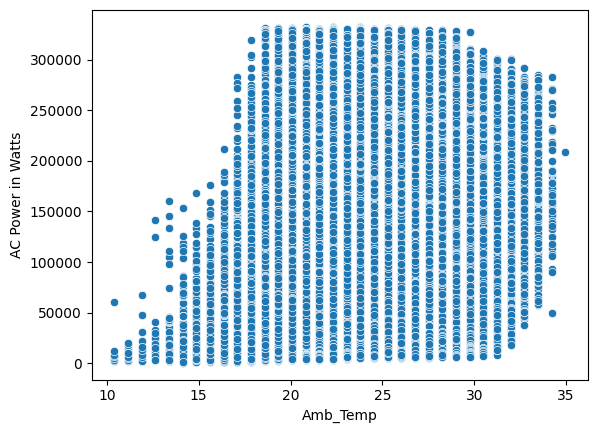

In [8]:
sns.scatterplot(df ,x='Amb_Temp' ,y='AC Power in Watts')

<Axes: xlabel='Amb_Temp', ylabel='IRR (W/m2)'>

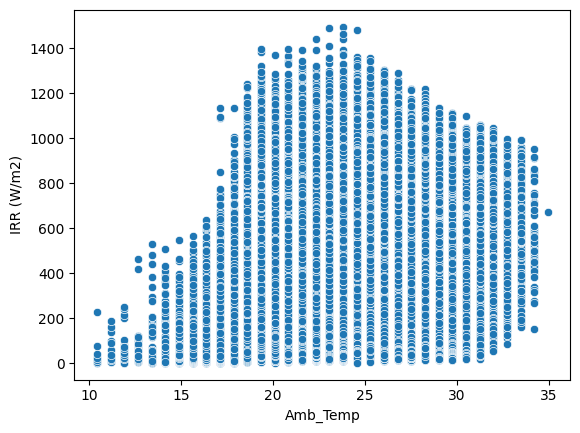

In [9]:
sns.scatterplot(df ,x='Amb_Temp' ,y='IRR (W/m2)')

<Axes: xlabel='DC Current in Amps', ylabel='AC Power in Watts'>

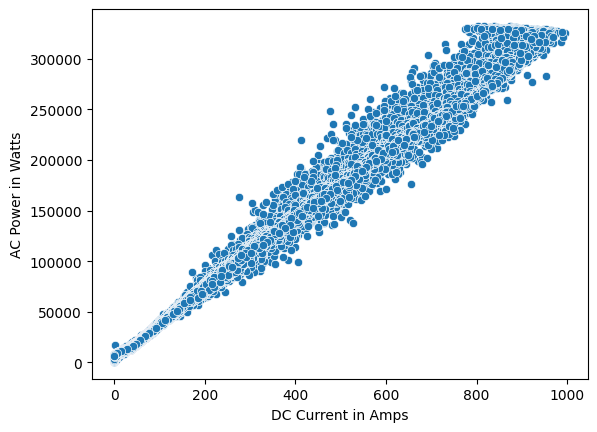

In [7]:
sns.scatterplot(df ,x='DC Current in Amps' ,y='AC Power in Watts')

<Axes: >

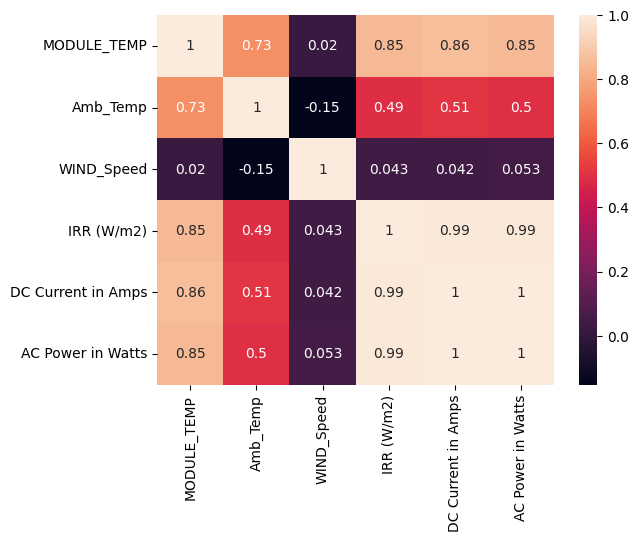

In [4]:
sns.heatmap(df.iloc[:,[0,1,2,3,4,-1]].corr() ,annot=True)

<Axes: ylabel='Amb_Temp'>

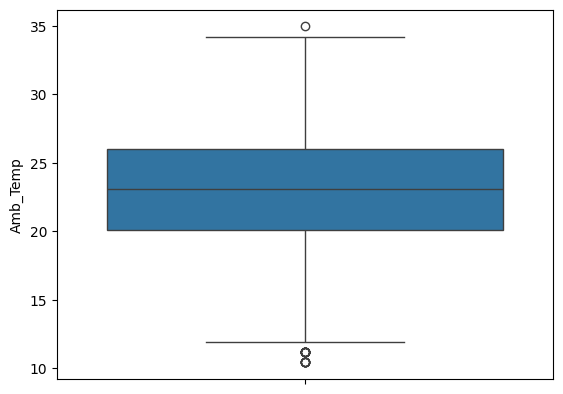

In [11]:
sns.boxplot(df['Amb_Temp'])

<Axes: ylabel='IRR (W/m2)'>

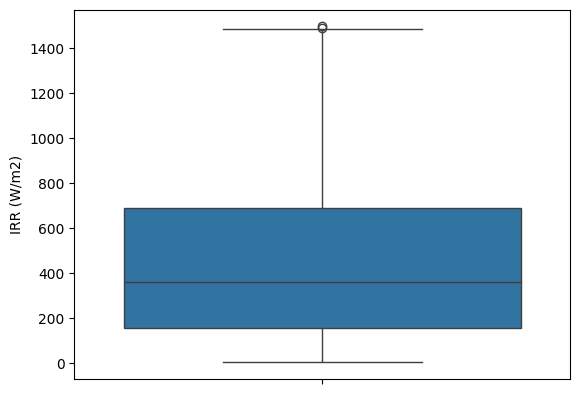

In [12]:
sns.boxplot(df['IRR (W/m2)'])

<Axes: ylabel='AC Power in Watts'>

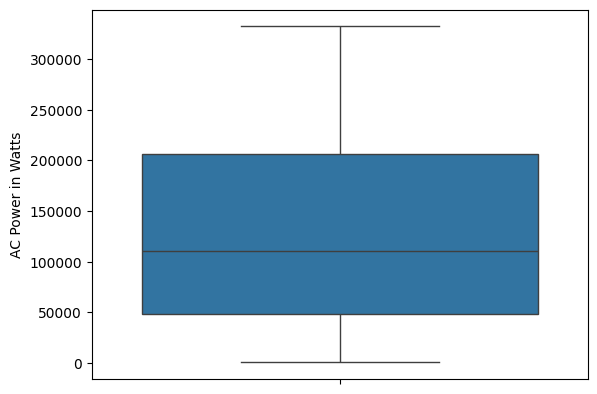

In [13]:
sns.boxplot(df['AC Power in Watts'])

In [3]:
X = df.iloc[:,[1,2,3]]
y = df['AC Power in Watts']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
gbr = GradientBoostingRegressor()
xgb = XGBRegressor()

estimators = [('gbr',gbr),('xgb',xgb)]
vot = VotingRegressor(estimators=estimators ,n_jobs=-1)

In [5]:
pipe_for_ac = Pipeline([
    ('scaler' ,StandardScaler()),
    ('ensemble' ,vot)
])

pipe_for_ac.fit(X_train, y_train)
y_pred = pipe_for_ac.predict(X_test)

In [6]:
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred))
print('R2 Score :',r2_score(y_test,y_pred))

Mean Absolute Error : 6534.064888268686
R2 Score : 0.9838855717991383


In [7]:
pipe_for_ac

Pipeline(steps=[('scaler', StandardScaler()),
                ('ensemble',
                 VotingRegressor(estimators=[('gbr',
                                              GradientBoostingRegressor()),
                                             ('xgb',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           device=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=None...
                                                           gamma=None,
                                                           grow_policy=None,
                                                           importance_type=None,
                                                           interaction_constraints=None,
                                                           learning_rate=None,
                                                           max_bin=None,
                                                           max_cat_threshold=None,
                                                           max_cat_to_onehot=None,
                                                           max_delta_step=None,
                                                           max_depth=None,
                                                           max_leaves=None,
                                                           min_child_weight=None,
                                                           missing=nan,
                                                           monotone_constraints=None,
                                                           multi_strategy=None,
                                                           n_estimators=None,
                                                           n_jobs=None,
                                                           num_parallel_tree=None, ...))],
                                 n_jobs=-1))])

In [8]:
# For DC
X = df.iloc[:,[1,2,3,-1]]
y = df['DC Current in Amps']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
pipe_for_dc = Pipeline([
    ('scaler' ,StandardScaler()),
    ('xgbregressor' ,XGBRegressor())
])

pipe_for_dc.fit(X_train, y_train)
y_pred = pipe_for_dc.predict(X_test)

In [10]:
print('Mean Absolute Error :',mean_absolute_error(y_test,y_pred))
print('R2 Score :',r2_score(y_test,y_pred))

Mean Absolute Error : 5.815975833276401
R2 Score : 0.9983331835415329


In [11]:
pipe_for_dc

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [12]:
from joblib import dump
dump(pipe_for_ac, 'model_ac_compressed.joblib', compress=8)

['model_ac_compressed.joblib']

In [13]:
dump(pipe_for_dc, 'model_dc_compressed.joblib', compress=2)

['model_dc_compressed.joblib']

In [7]:
sum([0.022139543667435646,
    1.424452304840088,
    4.70346212387085,
    8.20770263671875,
    10.335020065307617,
    9.114863395690918,
    10.554606437683105,
    11.822259902954102,
    9.136427879333496,
    5.135516166687012,
    4.098629951477051,
    2.8756837844848633,
    0.8575862050056458,
    0.2537212669849396])*600

47125.24299882352